구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/yolov4/

/content/drive/MyDrive/yolov4


darknet 설치 [yolov4]

In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git /content/drive/MyDrive/yolovs

Cloning into '/content/drive/MyDrive/yolovs'...
remote: Enumerating objects: 15308, done.
remote: Total 15308 (delta 0), reused 0 (delta 0), pack-reused 15308
Receiving objects: 100% (15308/15308), 13.70 MiB | 8.73 MiB/s, done.
Resolving deltas: 100% (10402/10402), done.
Checking out files: 100% (2044/2044), done.


darknet 폴더 안에 Makefile 내용 수정


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd /content/drive/MyDrive/yolov4/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/drive/MyDrive/yolov4


GPU 버전 확인 (설치 확인)

In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


yolov3 학습 데이터 다운받기?

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights


In [ ]:
!chmod +x *.sh

make 하기..

In [ ]:
!make

yolov4 기존 학습 weight 파일 다운로드
https://drive.google.com/open?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT

이제 테스트 해보기!
이 코드 실행 위치는 항상 yolo가 설치된 폴더 안에서!


In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

yolov3 weight, cfg 를 이용한 이미지 객체 검출

In [1]:
%cd /content/drive/MyDrive/yolov4/
!./darknet detect cfg/yolov3.cfg yolov3.weights data/cars_6.jpg
imShow('predictions.jpg')

[Errno 2] No such file or directory: '/content/drive/MyDrive/yolov4/'
/content
/bin/bash: ./darknet: No such file or directory


NameError: ignored

yolov3 를 이용한 웹캠 객체 검출

In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
^C


In [ ]:
#권한 에러 발생시 실행
!chmod +x ./darknet

In [ ]:
!./darknet detector cfg/yolov3_custom.cfg backup/yolov3_custom_last.weights data/obj/data_0.jpg 
imShow("predictions.jpg")

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg backup/yolov3_custom_last.weights data/obj/data_2.jpg -thresh 0.6
imShow('predictions.jpg')

Pretrain 모델 다운

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74


In [ ]:
!python generate_train.py


In [ ]:
!pwd

/content/drive/My Drive/yolov4


In [ ]:
!chmod +x ./darknet

In [ ]:
# train your custom detector
#!./darknet detector train data/obj.data cfg/yolov3-voc_custom.cfg darknet53.conv.74 -dont_show
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

**TRICK**: If for some reason you get an error or your Colab goes idle during training, you have not lost your weights! Every 100 iterations a weights file called **yolov3_custom_last.weights** is saved to **mydrive/yolov3/backup/** folder (wherever your backup folder is). This is why we created this folder in our Google drive and not on the cloud VM. If your runtime crashes and your backup folder was in your cloud VM you would lose your weights and your training progress.

We can kick off training from our last saved weights file so that we don't have to restart! WOOHOO! Just run the following command but with your backup location.
```
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolo/backup/yolov3-tiny_last.weights -dont_show
```

In [ ]:

!./darknet detector train data/obj.data cfg/yolov4-custom.cfg /content/drive/MyDrive/yolov4/yolov4.weights -dont_show


훈련을 시켜보자! v4

In [ ]:
! ./darknet detector train data/obj.data cfg/yolov4-custom.cfg weight/yolov4.conv.137 -dont_show

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-custom.cfg backup/yolov4-custom_final.weights -dont_show

이어서 학습


In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-custom.cfg backup/yolov4-custom_last.weights -dont_show

객체 탐지하기


 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
^C


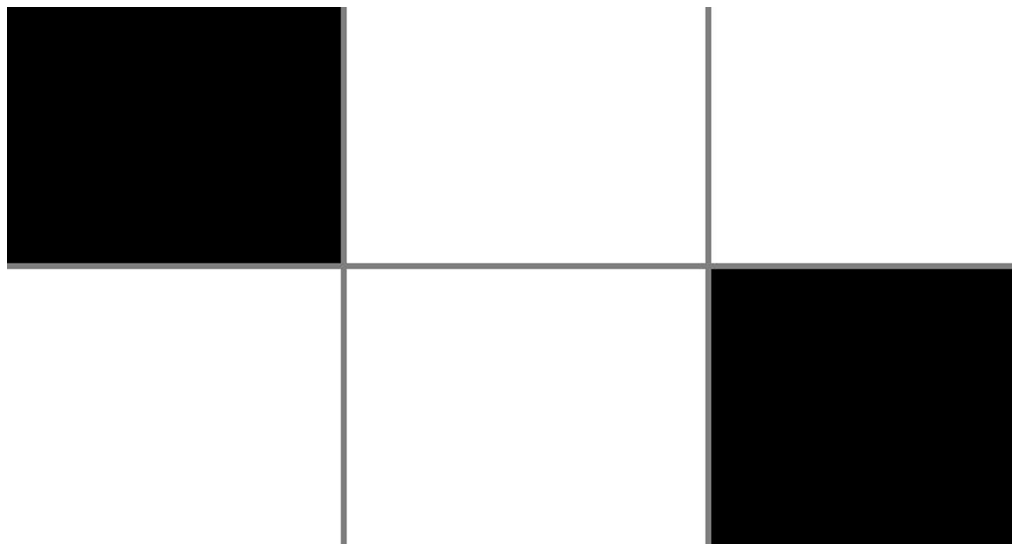

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-custom.cfg backup/yolov4-custom_final.weights data/obj3/data_12.png -thresh 0.3
imShow('predictions.jpg')

# 새 섹션